## Bước: Import thư viện 

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category= ConvergenceWarning)

## Bước 1: Tiền xử lý và gán nhãn 

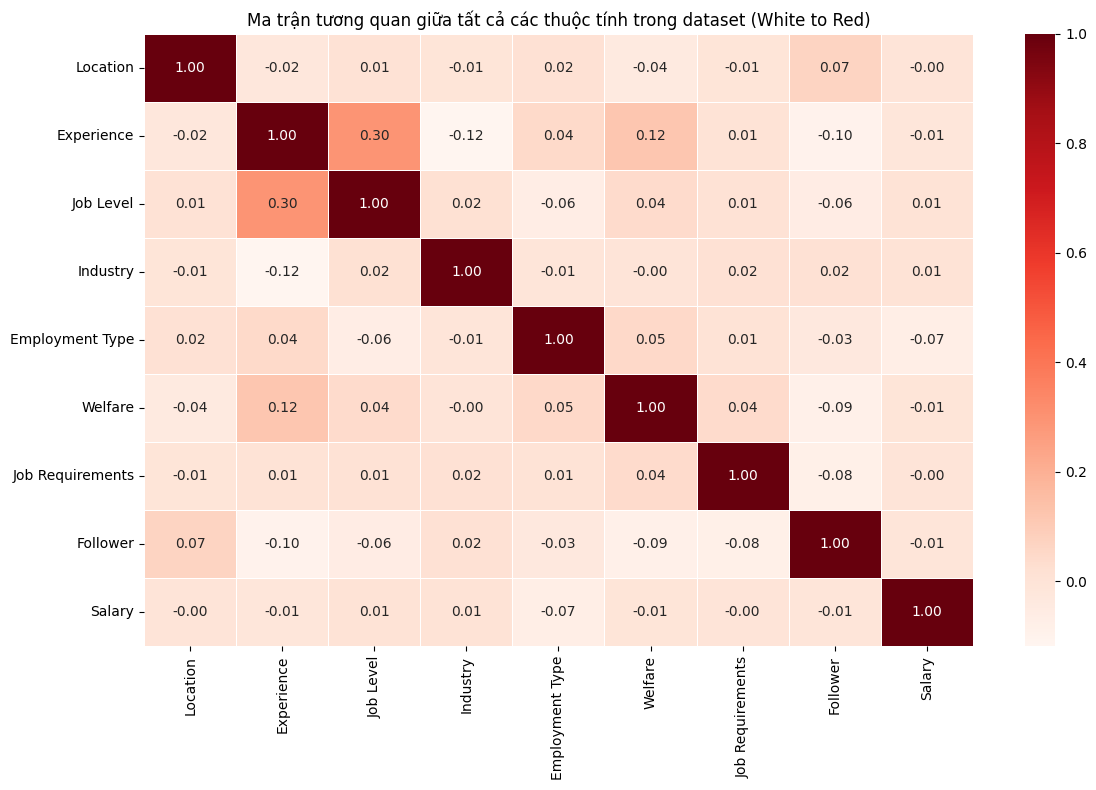

In [2]:
# Biểu đồ Heatmap 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dataset Defined_salary.csv
df = pd.read_csv('Defined_salary.csv')

# Kiểm tra kiểu dữ liệu của các cột và thực hiện mã hóa cho các cột phân loại
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Mã hóa các cột phân loại thành số (nếu có)
for col in df.columns:
    if df[col].dtype == 'object':  # Kiểm tra xem cột có phải là kiểu phân loại
        df[col] = label_encoder.fit_transform(df[col])

# Tính toán ma trận tương quan giữa tất cả các thuộc tính
correlation_matrix = df.corr()

# Tạo bảng màu tùy chỉnh từ trắng sang đỏ
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Ma trận tương quan giữa tất cả các thuộc tính trong dataset (White to Red)")
plt.tight_layout()
plt.show()

In [3]:
# Tiền xử lý và gán nhãn 
# Đọc dữ liệu
data = pd.read_csv('Defined_salary.csv')

# 1. Xử lý dữ liệu thiếu
data.dropna(inplace=True)  # Loại bỏ các dòng có giá trị thiếu

# 2. Chuyển đổi kiểu dữ liệu
# Mã hóa cột 'Location', 'Job Level', 'Employment Type' bằng Label Encoding
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Job Level'] = label_encoder.fit_transform(data['Job Level'])
data['Employment Type'] = label_encoder.fit_transform(data['Employment Type'])

# Tách các danh sách trong 'Industry', 'Welfare', 'Job Requirements' thành các đặc trưng nhị phân
data['Industry'] = data['Industry'].apply(lambda x: len(eval(x)))  # Số lượng ngành nghề
data['Welfare'] = data['Welfare'].apply(lambda x: len(eval(x)))  # Số lượng quyền lợi
data['Job Requirements'] = data['Job Requirements'].apply(lambda x: len(eval(x)))  # Số lượng yêu cầu

# 3. Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
data[['Experience', 'Follower', 'Salary']] = scaler.fit_transform(data[['Experience', 'Follower', 'Salary']])

# 4. Phân chia tập dữ liệu
from sklearn.model_selection import train_test_split

X = data.drop('Salary', axis=1)  # Dữ liệu đầu vào
y = data['Salary']  # Nhãn đầu ra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dữ liệu đã được tiền xử lý xong!")


Dữ liệu đã được tiền xử lý xong!


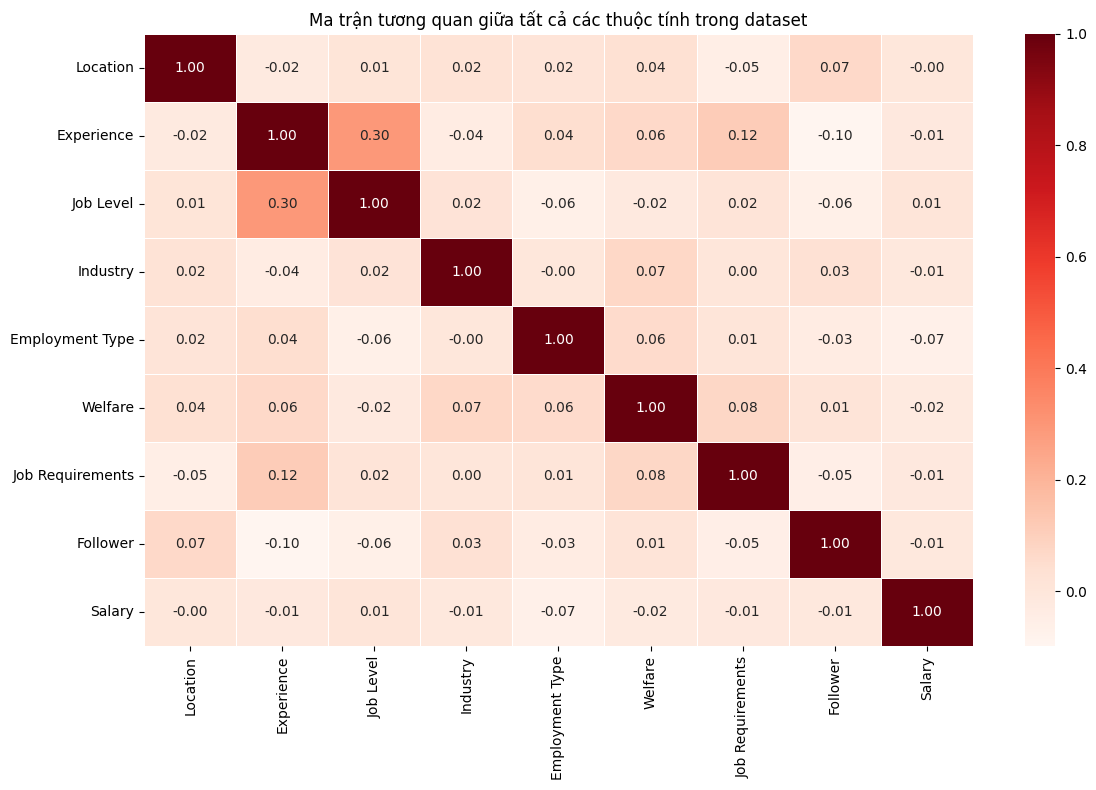

Dữ liệu đã được tiền xử lý xong!


In [4]:
# Kĩ hơn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Đọc dữ liệu
data = pd.read_csv('Defined_salary.csv')

# 2. Xử lý dữ liệu thiếu
# Loại bỏ các dòng có giá trị thiếu (NaN)
data.dropna(inplace=True)  # Bạn cũng có thể sử dụng data.fillna() nếu muốn thay thế giá trị thiếu

# 3. Chuyển đổi kiểu dữ liệu cho các cột phân loại
label_encoder = LabelEncoder()

# Mã hóa các cột phân loại (categorical columns)
categorical_columns = ['Location', 'Job Level', 'Employment Type']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# 4. Tách các danh sách trong các cột thành đặc trưng nhị phân
# Cột 'Industry', 'Welfare', 'Job Requirements' chứa danh sách (chuỗi)
# Ta sẽ đếm số lượng phần tử trong các danh sách này để chuyển thành các đặc trưng
data['Industry'] = data['Industry'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
data['Welfare'] = data['Welfare'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
data['Job Requirements'] = data['Job Requirements'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# 5. Chuẩn hóa dữ liệu
scaler = MinMaxScaler()

# Các cột cần chuẩn hóa (các cột số liên tục)
columns_to_scale = ['Experience', 'Follower', 'Salary']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# 6. Tính toán ma trận tương quan giữa các thuộc tính
correlation_matrix = data.corr()

# 7. Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Ma trận tương quan giữa tất cả các thuộc tính trong dataset")
plt.tight_layout()
plt.show()

# 8. Phân chia tập dữ liệu thành tập huấn luyện và kiểm tra
X = data.drop('Salary', axis=1)  # Dữ liệu đầu vào (tất cả các cột trừ 'Salary')
y = data['Salary']  # Nhãn đầu ra (cột 'Salary')

# Chia tập dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dữ liệu đã được tiền xử lý xong!")


## Bước 2: Model 

In [5]:
# Tách nhóm mô hình đầu tiên
models_part_1 = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.1, 1.0, 10.0]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.01, 0.1, 1.0]}
    },
    "ElasticNet Regression": {
        "model": ElasticNet(),
        "params": {"alpha": [0.01, 0.1, 1.0], "l1_ratio": [0.2, 0.5, 0.8]}
    },
    "Support Vector Regression (SVR)": {
        "model": SVR(),
        "params": {"kernel": ["linear", "rbf"], "C": [0.1, 1.0, 10.0]}
    },
    "KNeighbors Regressor": {
        "model": KNeighborsRegressor(),
        "params": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
    },
    "Gradient Boosting Regressor": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    }
}

# Huấn luyện và đánh giá các mô hình từ đoạn 1
model_results_part_1 = {}
print("Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 1):")

# Duyệt qua các mô hình và tối ưu tham số với GridSearchCV
for model_name, model_info in models_part_1.items():
    grid_search = GridSearchCV(
        estimator=model_info["model"],
        param_grid=model_info["params"],
        cv=3,
        scoring="neg_mean_absolute_error",
        verbose=0,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    model_results_part_1[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
    print(f"{model_name}: MAE={mae}, RMSE={rmse}, R²={r2}")

Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 1):
Linear Regression: MAE=0.0007064781513528993, RMSE=0.001409534643827769, R²=-1626.3774853503685
Ridge Regression: MAE=0.0006780833331954349, RMSE=0.0013598180705518108, R²=-1513.6015977392324
Lasso Regression: MAE=0.000344641550006292, RMSE=0.00034574509989540586, R²=-96.91491736459088
ElasticNet Regression: MAE=0.000344641550006292, RMSE=0.00034574509989540586, R²=-96.91491736459088
Support Vector Regression (SVR): MAE=0.09709185852754428, RMSE=0.0971737001486474, R²=-7734535.159823761
KNeighbors Regressor: MAE=0.0008852844545784088, RMSE=0.015337572389533262, R²=-192684.9485344651
Gradient Boosting Regressor: MAE=0.0009960697222139694, RMSE=0.028894775017522176, R²=-683871.9545155789


In [6]:
models_part_2 = {
"XGBoost Regressor": {
        "model": xgb.XGBRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    }
}
for model_name, model_info in models_part_2.items():
    grid_search = GridSearchCV(
        estimator=xgb.XGBRegressor(),
        param_grid={
            "n_estimators": [50, 100],
            "learning_rate": [0.1],
            "max_depth": [3]
        },
        cv=3,
        scoring="neg_mean_absolute_error",
        verbose=0,
        n_jobs=-1,
        error_score='raise'  # Tạo ra thông báo lỗi chi tiết hơn
    )
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    model_results_part_2 = {}
    print("Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 2):")
    
    model_results_part_2[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
    print(f"{model_name}: MAE={mae}, RMSE={rmse}, R²={r2}")


Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 2):
XGBoost Regressor: MAE=0.0008118890336151689, RMSE=0.006864281718466151, R²=-38593.63984783683


In [7]:
models_part_3 = {
    "Random Forest Regressor": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    }
}

# Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 3)
for model_name, model_info in models_part_3.items():
    grid_search = GridSearchCV(
        estimator=model_info["model"],
        param_grid=model_info["params"],
        cv=3,
        scoring="neg_mean_absolute_error",
        verbose=0,
        n_jobs=-1,
        error_score='raise'  # Tạo ra thông báo lỗi chi tiết hơn
    )
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    model_results_part_3 = {}
    print("Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 3):")
    
    model_results_part_3[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
    print(f"{model_name}: MAE={mae}, RMSE={rmse}, R²={r2}")


Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 3):
Random Forest Regressor: MAE=0.000659755047070718, RMSE=0.007377409969628554, R²=-44579.46876635139


In [ ]:
# Mở rộng không gian tham số
models_part_4 = {
    "Decision Tree Regressor": {
        "model": DecisionTreeRegressor(),
        "params": {"max_depth": [3, 5, 7, 10, None], "min_samples_split": [2, 5, 10, 15]}
    },
    "AdaBoost Regressor": {
        "model": AdaBoostRegressor(),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5, 1.0]}
    }
}
# Huấn luyện và đánh giá các mô hình
model_results_part_4 = {}
print("Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 4):")

for model_name, model_info in models_part_4.items():
    try:
        grid_search = GridSearchCV(
            estimator=model_info["model"],
            param_grid=model_info["params"],
            cv=3,
            scoring="neg_mean_absolute_error",
            verbose=1,  # In ra các thông tin trong quá trình huấn luyện
            n_jobs=-1,
            error_score='raise'  # Đưa ra thông báo chi tiết nếu có lỗi
        )
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        model_results_part_3[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
        print(f"{model_name}: MAE={mae}, RMSE={rmse}, R²={r2}")
    except Exception as e:
        print(f"Error in {model_name}: {e}")

Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 3):
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Decision Tree Regressor: MAE=0.0011326886032059814, RMSE=0.029823813913017045, R²=-728555.3637620417
Fitting 3 folds for each of 12 candidates, totalling 36 fits
AdaBoost Regressor: MAE=0.0012112641641907084, RMSE=0.01459445860205915, R²=-174465.79064183545


In [26]:
# Tách nhóm mô hình thứ bốn 
models_part_5 = {
    "Huber Regressor": {
        "model": HuberRegressor(),
        "params": {"epsilon": [1.35, 1.5, 1.75, 2.0, 2.5], "alpha": [0.1, 1.0, 10.0], "max_iter": [1000, 5000, 10000]}
    },
    "LinearSVR": {
        "model": LinearSVR(),
        "params": {"C": [0.0001, 10.0], "epsilon": [0.00001, 0.1], "max_iter": [1000000, 2000000], "tol": [1e-10, 1e-11]}
    },
    "Bagging Regressor": {
        "model": BaggingRegressor(),
        "params": {"n_estimators": [50, 100, 200], "max_samples": [0.5, 0.75, 1.0]}
    },
    # "LGBM Regressor": {
    #     "model": lgb.LGBMRegressor(),
    #     "params": {
    #         "n_estimators": [50, 100, 200],
    #         "learning_rate": [0.01, 0.1, 0.2],
    #         "num_leaves": [31, 50, 100]
    #     }
    # }
}
# Huấn luyện và đánh giá các mô hình từ đoạn 4
model_results_part_5 = {}
print("Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 4):")

for model_name, model_info in models_part_4.items():
    grid_search = GridSearchCV(
        estimator=model_info["model"],
        param_grid=model_info["params"],
        cv=3,
        scoring="neg_mean_absolute_error",
        verbose=0,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    model_results_part_4[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
    print(f"{model_name}: MAE={mae}, RMSE={rmse}, R²={r2}")

Dò tìm tham số và đánh giá hiệu suất các mô hình (Phần 4):
Huber Regressor: MAE=1.320765865256614e-05, RMSE=3.440837487188667e-05, R²=0.030238102423633118
LinearSVR: MAE=0.005909790730051978, RMSE=0.0064225571199307335, R²=-33786.242204456794
Bagging Regressor: MAE=0.0007573171433729964, RMSE=0.01153839384090438, R²=-109049.46244274302


In [28]:
# Kiểm tra mô hình tốt nhất sau khi huấn luyện
best_model_results = {}
print("Kết quả của mô hình tốt nhất từ các phần:")

# Lấy các kết quả đã tính từ các phần
all_results = {**model_results_part_1, **model_results_part_2, **model_results_part_3,**model_results_part_4, **model_results_part_5}

# Tìm mô hình tốt nhất
best_model_name = min(all_results, key=lambda x: all_results[x]['MAE'])  # Mô hình với MAE thấp nhất
best_model = all_results[best_model_name]

print(f"Model tốt nhất: {best_model_name}")
print(f"MAE={best_model['MAE']}, RMSE={best_model['RMSE']}, R²={best_model['R²']}")

Kết quả của mô hình tốt nhất từ các phần:
Model tốt nhất: Huber Regressor
MAE=1.320765865256614e-05, RMSE=3.440837487188667e-05, R²=0.030238102423633118


## Bước 3: Vẽ biểu đồ so sánh hiệu suất 

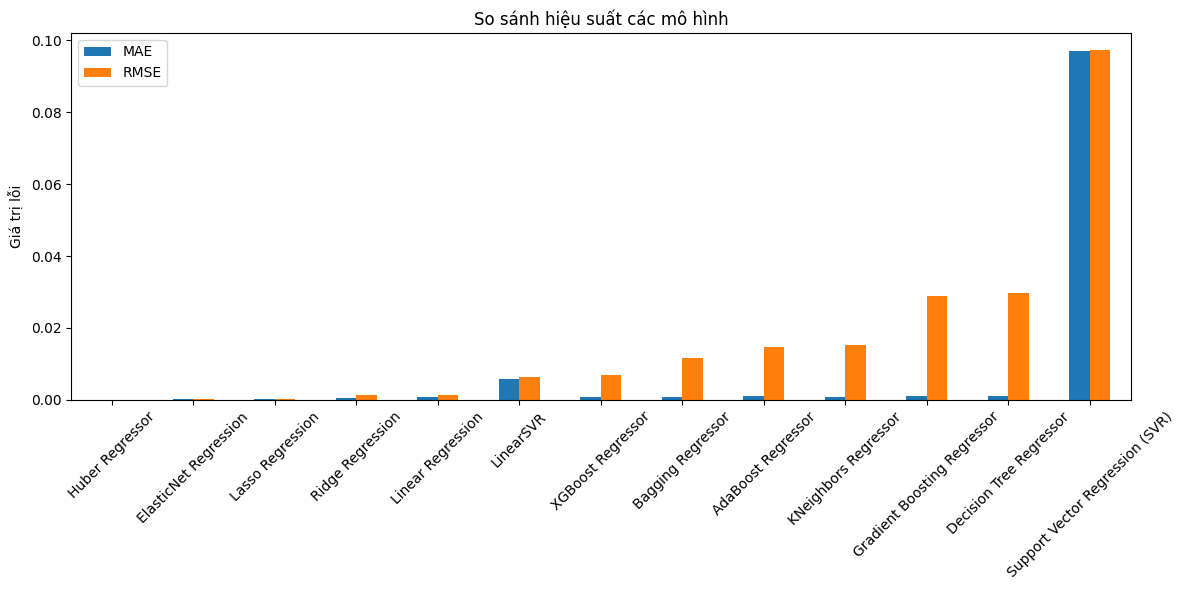

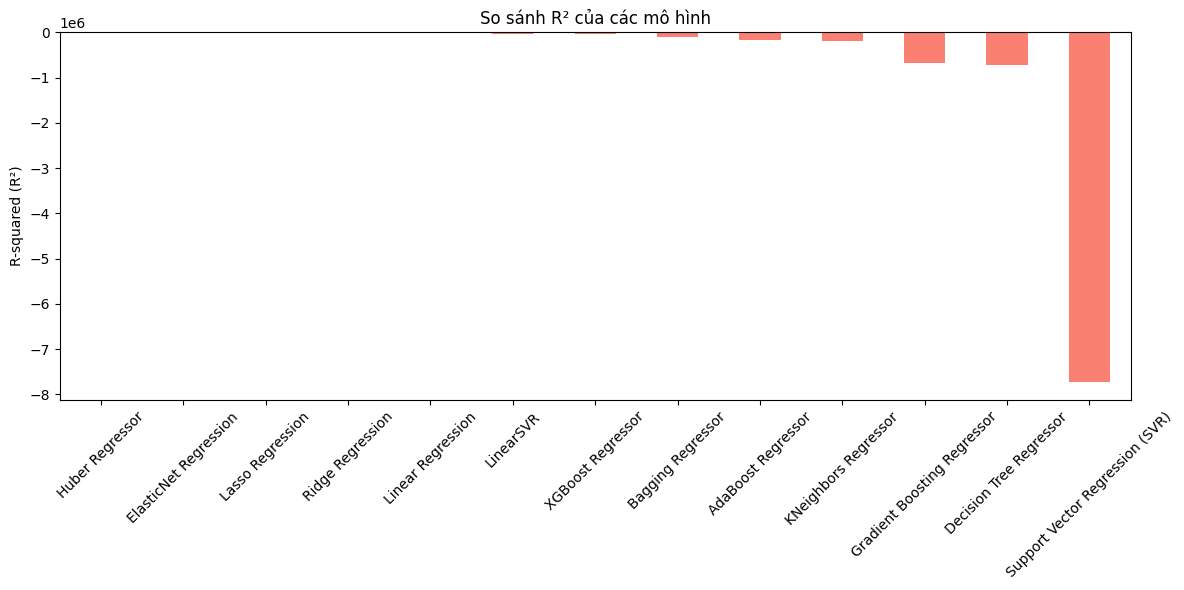


Kết quả hiệu suất mô hình (sorted by R²):
                                      MAE      RMSE            R²
Huber Regressor                  0.000013  0.000034  3.023810e-02
ElasticNet Regression            0.000345  0.000346 -9.691492e+01
Lasso Regression                 0.000345  0.000346 -9.691492e+01
Ridge Regression                 0.000678  0.001360 -1.513602e+03
Linear Regression                0.000706  0.001410 -1.626377e+03
LinearSVR                        0.005910  0.006423 -3.378624e+04
XGBoost Regressor                0.000812  0.006864 -3.859364e+04
Bagging Regressor                0.000757  0.011538 -1.090495e+05
AdaBoost Regressor               0.001211  0.014594 -1.744658e+05
KNeighbors Regressor             0.000885  0.015338 -1.926849e+05
Gradient Boosting Regressor      0.000996  0.028895 -6.838720e+05
Decision Tree Regressor          0.001133  0.029824 -7.285554e+05
Support Vector Regression (SVR)  0.097092  0.097174 -7.734535e+06


In [30]:
# 3. So sánh hiệu suất các mô hình
import matplotlib.pyplot as plt
import pandas as pd
# Chuyển kết quả sang DataFrame để trực quan hóa
results_df = pd.DataFrame(all_results).T  # Chuyển vị để dễ đọc
results_df.sort_values(by="R²", ascending=False, inplace=True)  # Sắp xếp theo R²
# Vẽ biểu đồ so sánh
results_df[["MAE", "RMSE"]].plot(kind="bar", figsize=(12, 6))
plt.title("So sánh hiệu suất các mô hình")
plt.ylabel("Giá trị lỗi")
plt.xticks(rotation=45)
plt.legend(["MAE", "RMSE"])
plt.tight_layout()
plt.show()
# Vẽ biểu đồ R²
plt.figure(figsize=(12, 6))
results_df["R²"].plot(kind="bar", color='salmon')
plt.title("So sánh R² của các mô hình")
plt.ylabel("R-squared (R²)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\nKết quả hiệu suất mô hình (sorted by R²):")
print(results_df)

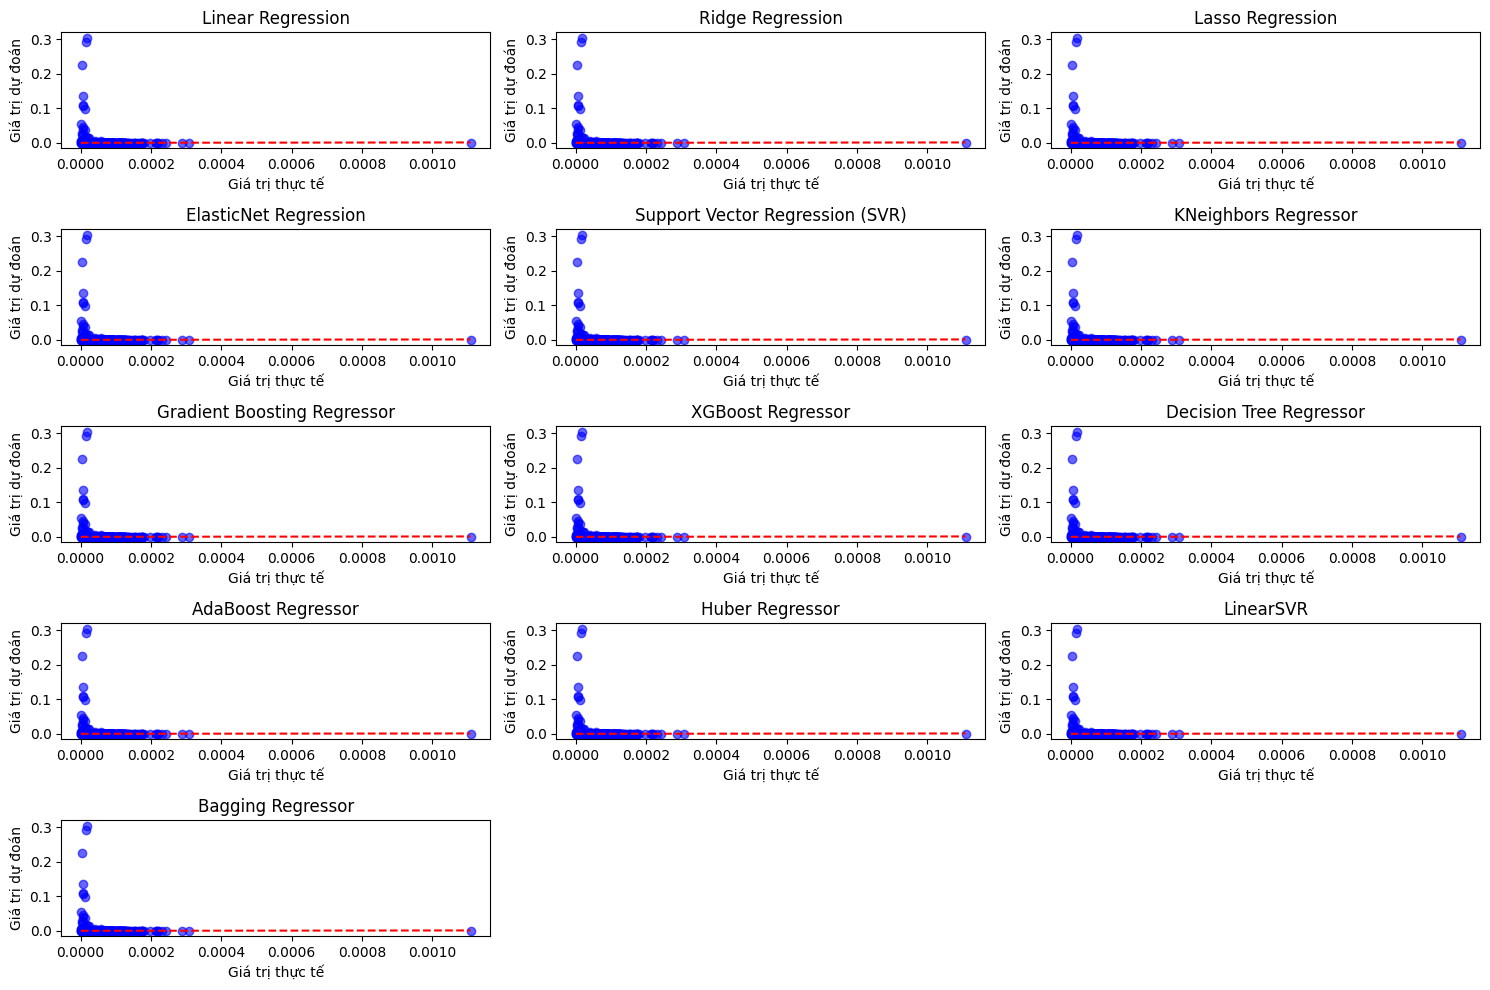

In [49]:
import matplotlib.pyplot as plt

# Tạo biểu đồ cho từng mô hình tối ưu
plt.figure(figsize=(15, 10))

# Duyệt qua các mô hình và vẽ biểu đồ cho từng mô hình
for idx, (model_name, model_info) in enumerate(all_results.items(), 1):
    # Lấy mô hình tốt nhất từ GridSearchCV
    best_model = grid_search.best_estimator_ if model_name != "Random Forest Regressor" else grid_search.best_estimator_
    
    # Dự đoán giá trị từ mô hình
    y_pred = best_model.predict(X_test)
    
    # Tạo một subplot cho mỗi mô hình
    plt.subplot(5, 3, idx)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Dòng chuẩn
    plt.title(f"{model_name}")
    plt.xlabel('Giá trị thực tế')
    plt.ylabel('Giá trị dự đoán')
    plt.tight_layout()

plt.show()
